Negative labels added successfully to: c:\Users\SimonettoS\OneDrive - University of Twente\Bureaublad\crawler\cybersecurity_dataset\output.json


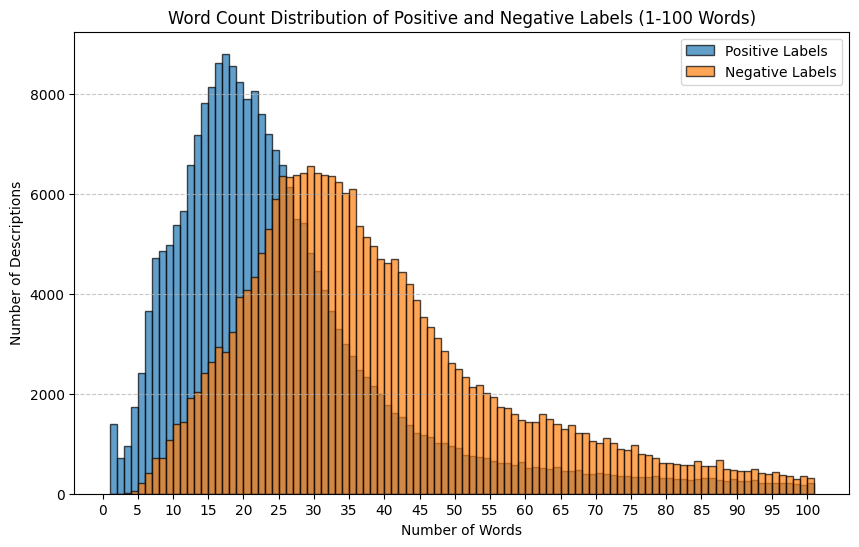

In [2]:
import json
import os
import matplotlib.pyplot as plt
import pickle
# Input and Output Paths
output_file = os.path.abspath("output.json")  # Use absolute path to avoid invalid file issues
cve_folder = "cve_list"  # Folder containing JSON files with CVE data

# Function to load CVE data and add negative labels
def add_negative_labels(cve_folder, output_file):
    """
    Load CVE data from JSON files in cve_folder and add to 'negative labels' in output_file.
    Ensures no duplicate descriptions are added.
    """
    # Ensure output file exists
    if not os.path.exists(output_file):
        raise FileNotFoundError(f"Output file not found: {output_file}")

    # Load existing data
    with open(output_file, "r", encoding="utf-8") as file:
        data = json.load(file)
    
    # Ensure 'negative labels' key exists
    if "negative labels" not in data:
        data["negative labels"] = []

    # Create a set to track existing descriptions
    existing_descriptions = {entry["description"] for entry in data["negative labels"]}

    # Process CVE files
    for filename in os.listdir(cve_folder):
        if filename.endswith(".json"):
            file_path = os.path.join(cve_folder, filename)
            with open(file_path, "r", encoding="utf-8") as cve_file:
                cve_data = json.load(cve_file)
                for entry in cve_data:
                    description = entry.get("Description", "").strip()
                    if description and description not in existing_descriptions:  # Avoid duplicates
                        data["negative labels"].append({
                            "type": "cve",
                            "description": description,
                            "embedding": "",
                            "word_count": len(description.split())
                        })
                        existing_descriptions.add(description)  # Add to the set

    # Save updated data back to output.json
    with open(output_file, "w", encoding="utf-8") as file:
        json.dump(data, file, indent=4)

    with open("balanced_dataset.pickle", "wb") as file:
        pickle.dump(data, file)
    print(f"Negative labels added successfully to: {output_file}")

def plot_word_count_combined_distribution(output_file):
    """
    Plot the distribution of word counts for both positive and negative labels on the same plot.
    """
    # Load data
    with open(output_file, "r", encoding="utf-8") as file:
        data = json.load(file)

    # Extract word counts for positive and negative labels
    positive_word_counts = [entry["word_count"] for entry in data.get("positive labels", []) if 1 <= entry["word_count"] <= 100]
    negative_word_counts = [entry["word_count"] for entry in data.get("negative labels", []) if 1 <= entry["word_count"] <= 100]
    
    # Plot combined distribution
    plt.figure(figsize=(10, 6))
    plt.hist(positive_word_counts, bins=range(1, 102), alpha=0.7, label="Positive Labels", edgecolor="black")
    plt.hist(negative_word_counts, bins=range(1, 102), alpha=0.7, label="Negative Labels", edgecolor="black")
    plt.title("Word Count Distribution of Positive and Negative Labels (1-100 Words)")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Descriptions")
    plt.xticks(range(0, 101, 5))
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Run the function
add_negative_labels(cve_folder, output_file)
plot_word_count_combined_distribution(output_file)

In [4]:
with open(output_file, "r", encoding="utf-8") as file:
    ou = json.load(file)
print(len(ou["positive labels"]))
print(len(ou["negative labels"]))

241400
241400


In [18]:
import json
import os
import random
import pickle

# Input and Output Paths
output_file = "output.json"  # Path to the existing output pickle file

# Function to filter descriptions with at least 5 words
def filter_short_descriptions(labels):
    return [entry for entry in labels if len(entry["description"].split()) >= 5]

# Function to balance positive and negative labels
def balance_labels(output_file):
    """
    Balance the positive and negative labels by:
    1. Filtering out descriptions with fewer than 5 words.
    2. Randomly reducing negative labels to match the number of positive labels.
    """
    # Load existing data
    if not os.path.exists(output_file):
        raise FileNotFoundError(f"Output file not found: {output_file}")

    with open(output_file, "rb") as file:
        data = json.load(file)

    # Filter descriptions with at least 5 words
    data["positive labels"] = filter_short_descriptions(data.get("positive labels", []))
    data["negative labels"] = filter_short_descriptions(data.get("negative labels", []))

    # Balance the number of positive and negative labels
    positive_count = len(data["positive labels"])
    negative_count = len(data["negative labels"])

    if negative_count > positive_count:
        # Randomly sample negative labels to match the positive count
        data["negative labels"] = random.sample(data["negative labels"], positive_count)
        print(f"Balanced negative labels to match positive labels: {positive_count} instances")
    else:
        print("Negative labels already balanced or fewer than positive labels")
    
    output_file = "output.pkl"  # Path to the existing output pickle file

    # Save updated data back to output.pkl
    with open(output_file, "wb") as file:
        pickle.dump(data, file)

    print(f"Balanced labels saved successfully to: {output_file}")

# Run the function
balance_labels(output_file)


Balanced negative labels to match positive labels: 196400 instances
Balanced labels saved successfully to: output.pkl


In [2]:
import pickle

output_file = "output.pkl"  # Path to the existing output pickle file

with open(output_file, "rb") as file:  # No 'encoding' parameter
    ou = pickle.load(file)

print(len(ou["positive labels"]))
print(len(ou["negative labels"]))

import json

196400
196400


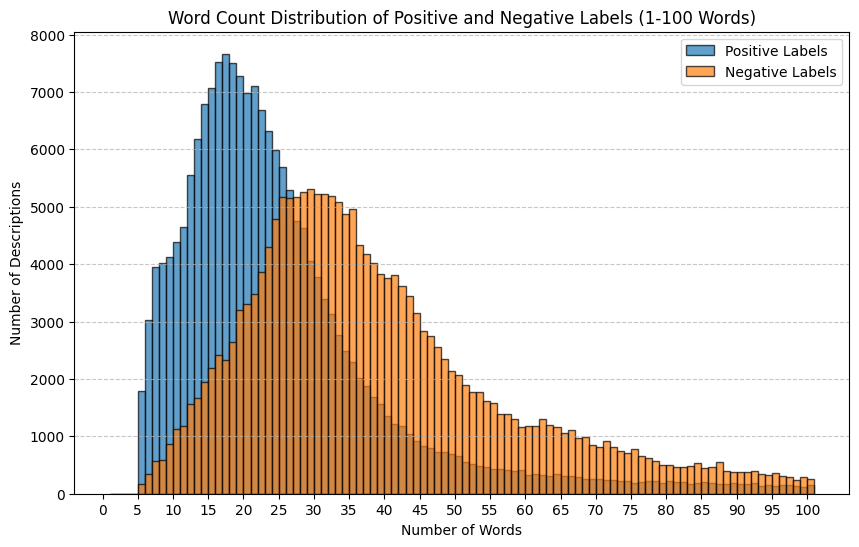

In [28]:
def plot_word_count_combined_distribution(output_file):
    """
    Plot the distribution of word counts for both positive and negative labels on the same plot.
    """
    # Load data
    with open(output_file, "rb") as file:
        data = pickle.load(file)

    # Extract word counts for positive and negative labels
    positive_word_counts = [entry["word_count"] for entry in data.get("positive labels", []) if 1 <= entry["word_count"] <= 100]
    negative_word_counts = [entry["word_count"] for entry in data.get("negative labels", []) if 1 <= entry["word_count"] <= 100]
    
    # Plot combined distribution
    plt.figure(figsize=(10, 6))
    plt.hist(positive_word_counts, bins=range(1, 102), alpha=0.7, label="Positive Labels", edgecolor="black")
    plt.hist(negative_word_counts, bins=range(1, 102), alpha=0.7, label="Negative Labels", edgecolor="black")
    plt.title("Word Count Distribution of Positive and Negative Labels (1-100 Words)")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Descriptions")
    plt.xticks(range(0, 101, 5))
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
plot_word_count_combined_distribution(output_file)

In [3]:
with open("balanced_dataset.pickle", "rb") as file:
    ou = pickle.load(file)
print(len(ou["positive labels"]))

241400
